In [1]:
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

In [2]:
### Xây dựng không gian nền tương ứng
X = np.arange(0,101,1)
Y = X
Z = np.array( [0,4,18,32,46,60] )

In [3]:
### Xác định tiền đề và kết luận
D = ctrl.Antecedent( X,"Độ bẩn" )
G = ctrl.Antecedent( Y,"Lượng dầu mở" )
T = ctrl.Consequent( Z,"Thời gian giặt" )

C:\Users\ngodi\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


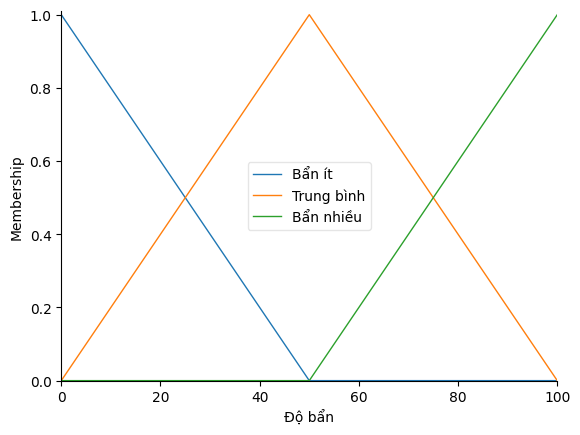

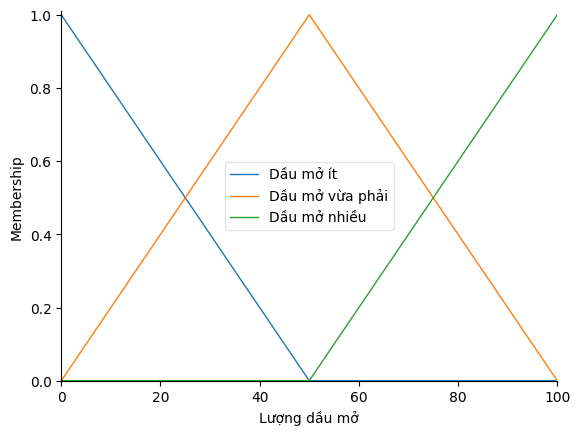

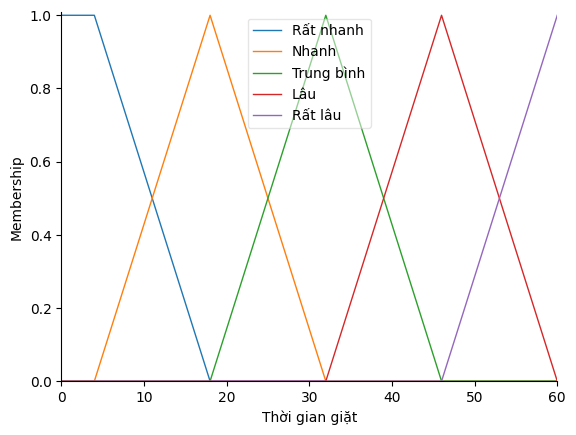

In [4]:
### Các tập mờ
D["Bẩn ít"] = fz.trimf( D.universe,[0,0,50] )
D["Trung bình"] = fz.trimf( D.universe,[0,50,100] )
D["Bẩn nhiều"] = fz.trimf( D.universe,[50,100,100] )
D.view()
G["Dầu mở ít"] = fz.trimf( G.universe,[0,0,50] )
G["Dầu mở vừa phải"] = fz.trimf( G.universe,[0,50,100] )
G["Dầu mở nhiều"] = fz.trimf( G.universe,[50,100,100] )
G.view()
T["Rất nhanh"] = fz.trapmf( T.universe,[0,0,4,18] )
T["Nhanh"] = fz.trimf( T.universe,[4,18,32] )
T["Trung bình"] = fz.trimf( T.universe,[18,32,46] )
T["Lâu"] = fz.trimf( T.universe,[32,46,60] )
T["Rất lâu"] = fz.trimf( T.universe,[46,60,60] )
T.view()

In [5]:
### Đưa các luật vào
R1 = ctrl.Rule( D["Bẩn ít"] & G["Dầu mở ít"], T["Rất nhanh"] )
R2 = ctrl.Rule( D["Bẩn ít"] & G["Dầu mở vừa phải"], T["Trung bình"] )
R3 = ctrl.Rule( D["Bẩn ít"] & G["Dầu mở nhiều"], T["Lâu"] )
R4 = ctrl.Rule( D["Trung bình"] & G["Dầu mở ít"], T["Nhanh"] )
R5 = ctrl.Rule( D["Trung bình"] & G["Dầu mở vừa phải"], T["Trung bình"] )
R6 = ctrl.Rule( D["Trung bình"] & G["Dầu mở nhiều"], T["Lâu"] )
R7 = ctrl.Rule( D["Bẩn nhiều"] & G["Dầu mở ít"], T["Trung bình"] )
R8 = ctrl.Rule( D["Bẩn nhiều"] & G["Dầu mở vừa phải"], T["Lâu"] )
R9 = ctrl.Rule( D["Bẩn nhiều"] & G["Dầu mở nhiều"], T["Rất lâu"] )
### Tạo mô hình đề suy diễn
model = ctrl.ControlSystemSimulation(ctrl.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9]))

Độ bẩn của áo quần: 40
Lượng dầu mở dính : 60
Với 40.00 độ bản và 60.00 lượng dầu mở trên áo quần, thời gian giặt là 36 phút


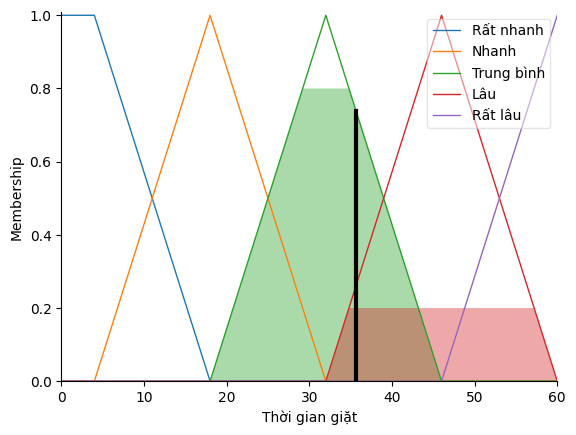

In [6]:
### Đưa dữ liệu vào để xử lý rồi xuất kết quả
B = float(input( "Độ bẩn của áo quần: " ))
C = float(input( "Lượng dầu mở dính : " ))
model.input["Độ bẩn"] = B
model.input["Lượng dầu mở"] = C
model.compute()
D = model.output["Thời gian giặt"]
print('Với %.2f độ bản và %.2f lượng dầu mở trên áo quần, thời gian giặt là %2.f phút' % (B,C,D) )
T.view(model)

#### 